# Weather Analysis


#### Trends Observed
* Trend 1-Latitude vs. Max Temperature plot shows typical relationship between the latitude and temperature. The temperatures of the cities that are away from 0 degree latitude drop consistently. 
* Trend 2-Latitude vs. Humidity plot shows high humidity percentages for the cities between 0 degree & 20 degree latitude whereas for higher latitudes the humidity ranges from low of below 20% to 100%. 
* Trend 3-The relationship of cloudiness and windspeed in the 500 cities look steady. To show any typical trend it will be imperative to do a comparative data analysis of overall weather trends of a few sample cities over a specifc period of time.

In [25]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import random
from pprint import pprint
from citipy import citipy
from config import api_key
import os
import csv
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import seaborn as sns

In [19]:
# settings = {"units": "metric", "appid": api_key}

In [26]:
# create empty list
cities = pd.DataFrame()
cities["Latitude"] = ""
cities["Longitude"] = ""

# Genarate Cities List

In [28]:
cities["Latitude"] = [np.random.uniform(-90, 90) for x in range(1500)]
cities["Longitude"] = [np.random.uniform(-180, 180) for x in range(1500)]

for index, row in cities.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)

                     
                     
    



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [30]:
cities = cities.drop_duplicates(['City', 'Country'])
cities = cities.dropna()
                                 
cities = cities[["City", "Country"]]                        
cities = cities.iloc[:500]               
cities = cities.reset_index(drop=True)
cities.head()

,City,Country
0,albany,au
1,yar-sale,ru
2,bluff,nz
3,tura,ru
4,bengkulu,id


# Perform API Calls

In [33]:
cities["Cloudiness"] =""
cities["Date"] =""
cities["Humidity"] =""
cities["Lat"] =""
cities["Lng"] =""
cities["Max Temp"] =""
cities["Wind Speed"] =""

In [41]:
# counter 

count = 1

# dictionary for parameters 
settings = {"units": "metric", "appid": api_key}

# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"


# Build query URL
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

print("Beginning Data Retrieval")
print("------------------------")


for index, row in cities.iterrows():
    try:
        cities_response = requests.get(query_url + row["City"] + "," + row["Country"]).json()
        pprint(f"Processing Record {count} | {row['City']}, {row['Country']}")
        print(cities_response)
        
        # row update
        count = count + 1
        
        cities.set_value(index, "Cloudiness", cities_response["clouds"]['all'])
        cities.set_value(index, "Date", cities_response["dt"])
        cities.set_value(index, "Humidity", cities_response["main"]['humidity'])
        cities.set_value(index, "Latitude", cities_response["coord"]['lat'])
        cities.set_value(index, "Longitude", cities_response["coord"]['lon'])
        cities.set_value(index, "Max Temperature", cities_response["main"]['temp_max'])
        cities.set_value(index, "Wind Speed", cities_response["wind"]['speed'])

    except:
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}**")
              
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
              
       

        

Beginning Data Retrieval
------------------------
'Processing Record 1 | albany, au'
{'coord': {'lon': 117.88, 'lat': -35.02}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 14.14, 'pressure': 1006.02, 'humidity': 91, 'temp_min': 14.14, 'temp_max': 14.14, 'sea_level': 1018.72, 'grnd_level': 1006.02}, 'wind': {'speed': 10.21, 'deg': 286.502}, 'rain': {'3h': 0.46}, 'clouds': {'all': 92}, 'dt': 1531693642, 'sys': {'message': 0.0032, 'country': 'AU', 'sunrise': 1531610027, 'sunset': 1531646129}, 'id': 2077963, 'name': 'Albany', 'cod': 200}
'Processing Record 2 | yar-sale, ru'
{'coord': {'lon': 70.83, 'lat': 66.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 13.04, 'pressure': 1028.64, 'humidity': 78, 'temp_min': 13.04, 'temp_max': 13.04, 'sea_level': 1029.75, 'grnd_level': 1028.64}, 'wind': {'speed': 1.16, 'deg': 184.502}, 'clouds': {'a

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is depre

'Processing Record 3 | bluff, nz'
{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.09, 'pressure': 1015.75, 'humidity': 88, 'temp_min': 11.09, 'temp_max': 11.09, 'sea_level': 1017.06, 'grnd_level': 1015.75}, 'wind': {'speed': 6.06, 'deg': 44.0018}, 'clouds': {'all': 64}, 'dt': 1531693643, 'sys': {'message': 0.0035, 'country': 'NZ', 'sunrise': 1531599907, 'sunset': 1531632037}, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
'Processing Record 4 | tura, ru'
{'coord': {'lon': 100.22, 'lat': 64.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.19, 'pressure': 978.87, 'humidity': 62, 'temp_min': 10.19, 'temp_max': 10.19, 'sea_level': 1028.08, 'grnd_level': 978.87}, 'wind': {'speed': 2.86, 'deg': 19.5018}, 'clouds': {'all': 0}, 'dt': 1531693643, 'sys': {'message': 0.0033, 'country': 'RU', 'sunr

'Processing Record 23 | iquique, cl'
{'coord': {'lon': -70.14, 'lat': -20.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16, 'pressure': 1013, 'humidity': 77, 'temp_min': 16, 'temp_max': 16}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 4644, 'message': 0.0038, 'country': 'CL', 'sunrise': 1531653352, 'sunset': 1531693054}, 'id': 3887127, 'name': 'Iquique', 'cod': 200}
'Processing Record 24 | mananjary, mg'
{'coord': {'lon': 46.8, 'lat': -19.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.84, 'pressure': 880.38, 'humidity': 69, 'temp_min': 7.84, 'temp_max': 7.84, 'sea_level': 1033.72, 'grnd_level': 880.38}, 'wind': {'speed': 2.01, 'deg': 192.002}, 'clouds': {'all': 0}, 'dt': 1531693645, 'sys': {'message': 0.0042, 'country': 'MG', 'sunrise': 1531

'Processing Record 41 | manama, bh'
{'coord': {'lon': 50.58, 'lat': 26.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 33.46, 'pressure': 994, 'humidity': 49, 'temp_min': 33, 'temp_max': 34}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 6974, 'message': 0.0076, 'country': 'BH', 'sunrise': 1531619708, 'sunset': 1531668728}, 'id': 290340, 'name': 'Manama', 'cod': 200}
'Processing Record 42 | rangpur, bd'
{'coord': {'lon': 89.24, 'lat': 25.76}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.14, 'pressure': 1008.78, 'humidity': 97, 'temp_min': 25.14, 'temp_max': 25.14, 'sea_level': 1012.16, 'grnd_level': 1008.78}, 'wind': {'speed': 3.96, 'deg': 98.0018}, 'rain': {'3h': 0.135}, 'clouds': {'all': 92}, 'dt': 1531693648, 'sys': {'message': 0.0058, 'country': 'BD

'Processing Record 58 | nikolskoye, ru'
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1013, 'humidity': 77, 'temp_min': 18, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 62.0018}, 'clouds': {'all': 0}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 7267, 'message': 0.0043, 'country': 'RU', 'sunrise': 1531616676, 'sunset': 1531681191}, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}
'Processing Record 59 | saldanha, za'
{'coord': {'lon': 17.94, 'lat': -33.01}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 10, 'pressure': 1028, 'humidity': 61, 'temp_min': 10, 'temp_max': 10}, 'wind': {'speed': 3.1, 'deg': 160}, 'clouds': {'all': 12}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 6575, 'message': 0.0032, 'country': 'ZA', 'sunrise': 1531633728, 'sunset': 1531670402},

'Processing Record 75 | barrow, us'
{'coord': {'lon': -90.4, 'lat': 39.51}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 30.71, 'pressure': 1014, 'humidity': 70, 'temp_min': 29, 'temp_max': 32}, 'visibility': 16093, 'wind': {'speed': 2.66, 'deg': 172.502}, 'clouds': {'all': 40}, 'dt': 1531691700, 'sys': {'type': 1, 'id': 978, 'message': 0.0055, 'country': 'US', 'sunrise': 1531651655, 'sunset': 1531704444}, 'id': 4252975, 'name': 'Barrow', 'cod': 200}
'Processing Record 76 | dunedin, nz'
{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.74, 'pressure': 980, 'humidity': 93, 'temp_min': 7.74, 'temp_max': 7.74, 'sea_level': 1020.26, 'grnd_level': 980}, 'wind': {'speed': 6.11, 'deg': 34.0018}, 'clouds': {'all': 80}, 'dt': 1531693403, 'sys': {'message': 0.0037, 'country': 'NZ', 'sunrise':

'Processing Record 93 | oranjestad, aw'
{'coord': {'lon': -70.03, 'lat': 12.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29, 'pressure': 1012, 'humidity': 74, 'temp_min': 29, 'temp_max': 29}, 'visibility': 10000, 'wind': {'speed': 9.3, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 4150, 'message': 0.0049, 'country': 'AW', 'sunrise': 1531650156, 'sunset': 1531696184}, 'id': 3577154, 'name': 'Oranjestad', 'cod': 200}
'Processing Record 94 | pevek, ru'
{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.84, 'pressure': 1021.43, 'humidity': 100, 'temp_min': 1.84, 'temp_max': 1.84, 'sea_level': 1028.57, 'grnd_level': 1021.43}, 'wind': {'speed': 3.76, 'deg': 299.502}, 'clouds': {'all': 88}, 'dt': 1531693656, 'sys': {'message': 0.0085, 'country': 'RU', 'sunris

'Processing Record 109 | vanimo, pg'
{'coord': {'lon': 141.3, 'lat': -2.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.19, 'pressure': 1021.99, 'humidity': 100, 'temp_min': 28.19, 'temp_max': 28.19, 'sea_level': 1022.09, 'grnd_level': 1021.99}, 'wind': {'speed': 4.01, 'deg': 126.502}, 'clouds': {'all': 76}, 'dt': 1531693658, 'sys': {'message': 0.0047, 'country': 'PG', 'sunrise': 1531600885, 'sunset': 1531644016}, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}
'Processing Record 110 | vaitupu, wf'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for vaitupu, wf**
'Processing Record 111 | tucuma, br'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for tucuma, br**
'Processing Record 112 | padang, id'
{'coord': {'lon': 100.36, 'lat': -0.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main

'Processing Record 127 | pontianak, id'
{'coord': {'lon': 109.34, 'lat': -0.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.39, 'pressure': 1018.67, 'humidity': 90, 'temp_min': 26.39, 'temp_max': 26.39, 'sea_level': 1021.4, 'grnd_level': 1018.67}, 'wind': {'speed': 3.21, 'deg': 155.502}, 'clouds': {'all': 48}, 'dt': 1531693661, 'sys': {'message': 0.013, 'country': 'ID', 'sunrise': 1531608307, 'sunset': 1531651935}, 'id': 1630789, 'name': 'Pontianak', 'cod': 200}
'Processing Record 128 | khatanga, ru'
{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 10.09, 'pressure': 1020.86, 'humidity': 65, 'temp_min': 10.09, 'temp_max': 10.09, 'sea_level': 1025.45, 'grnd_level': 1020.86}, 'wind': {'speed': 5.81, 'deg': 208.502}, 'clouds': {'all': 12}, 'dt': 1531693661, 'sys': {'message': 0.0049, 

'Processing Record 143 | grindavik, is'
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 301, 'main': 'Drizzle', 'description': 'drizzle', 'icon': '09d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 10, 'pressure': 1000, 'humidity': 100, 'temp_min': 10, 'temp_max': 10}, 'visibility': 3000, 'wind': {'speed': 2.6, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1531690200, 'sys': {'type': 1, 'id': 4832, 'message': 0.0057, 'country': 'IS', 'sunrise': 1531626616, 'sunset': 1531696743}, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
'Processing Record 144 | yichang, cn'
{'coord': {'lon': 111.32, 'lat': 30.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.64, 'pressure': 1000.27, 'humidity': 87, 'temp_min': 25.64, 'temp_max': 25.64, 'sea_level': 1017.18, 'grnd_level': 1000.27}, 'wind': {'speed': 2.11, 'deg': 179.502}, 'clouds': {'all': 0}, 'dt': 1

'Processing Record 159 | tomatlan, mx'
{'coord': {'lon': -105.25, 'lat': 19.93}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 29.29, 'pressure': 988.03, 'humidity': 77, 'temp_min': 29.29, 'temp_max': 29.29, 'sea_level': 1025.08, 'grnd_level': 988.03}, 'wind': {'speed': 1.66, 'deg': 288.502}, 'rain': {'3h': 3.1595}, 'clouds': {'all': 24}, 'dt': 1531693666, 'sys': {'message': 0.0031, 'country': 'MX', 'sunrise': 1531657840, 'sunset': 1531705402}, 'id': 3981391, 'name': 'Tomatlan', 'cod': 200}
'Processing Record 160 | omsukchan, ru'
{'coord': {'lon': 155.8, 'lat': 62.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.54, 'pressure': 937.37, 'humidity': 74, 'temp_min': 13.54, 'temp_max': 13.54, 'sea_level': 1025.94, 'grnd_level': 937.37}, 'wind': {'speed': 1.61, 'deg': 163.502}, 'clouds': {'all': 0}, 'dt': 1531693666, 'sys': {'messa

'Processing Record 177 | stawell, au'
{'coord': {'lon': 142.77, 'lat': -37.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 5.19, 'pressure': 982.44, 'humidity': 89, 'temp_min': 5.19, 'temp_max': 5.19, 'sea_level': 1019.45, 'grnd_level': 982.44}, 'wind': {'speed': 5.86, 'deg': 349.002}, 'rain': {'3h': 0.3525}, 'clouds': {'all': 92}, 'dt': 1531693669, 'sys': {'message': 0.0083, 'country': 'AU', 'sunrise': 1531604353, 'sunset': 1531639856}, 'id': 2148431, 'name': 'Stawell', 'cod': 200}
'Processing Record 178 | santa maria, cv'
{'coord': {'lon': -22.9, 'lat': 16.6}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1017, 'humidity': 78, 'temp_min': 24, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 6186, 'message': 0.0029, 'c

'Processing Record 196 | ayan, ru'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for ayan, ru**
'Processing Record 197 | mohgaon, in'
{'coord': {'lon': 78.72, 'lat': 21.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.14, 'pressure': 953.58, 'humidity': 96, 'temp_min': 24.14, 'temp_max': 24.14, 'sea_level': 1008.79, 'grnd_level': 953.58}, 'wind': {'speed': 2.76, 'deg': 272.502}, 'clouds': {'all': 56}, 'dt': 1531693672, 'sys': {'message': 0.0035, 'country': 'IN', 'sunrise': 1531613486, 'sunset': 1531661445}, 'id': 1262891, 'name': 'Mohgaon', 'cod': 200}
'Processing Record 198 | anadyr, ru'
{'coord': {'lon': 177.51, 'lat': 64.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16, 'pressure': 1010, 'humidity': 72, 'temp_min': 16, 'temp_max': 16}, 'visibility': 10000, 'wind': {'speed': 9, 'deg

'Processing Record 214 | chipinge, zw'
{'coord': {'lon': 32.62, 'lat': -20.19}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.79, 'pressure': 970.76, 'humidity': 93, 'temp_min': 13.79, 'temp_max': 13.79, 'sea_level': 1044.7, 'grnd_level': 970.76}, 'wind': {'speed': 5.46, 'deg': 153.002}, 'rain': {'3h': 0.835}, 'clouds': {'all': 92}, 'dt': 1531693675, 'sys': {'message': 0.004, 'country': 'ZW', 'sunrise': 1531628689, 'sunset': 1531668388}, 'id': 893549, 'name': 'Chipinge', 'cod': 200}
'Processing Record 215 | denpasar, id'
{'coord': {'lon': 115.22, 'lat': -8.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1011, 'humidity': 73, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1531690200, 'sys': {'type': 1, 'id': 8000, 'message': 0.0035, 'country

'Processing Record 232 | aklavik, ca'
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22, 'pressure': 1003, 'humidity': 46, 'temp_min': 22, 'temp_max': 22}, 'visibility': 24140, 'wind': {'speed': 3.1, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 3535, 'message': 0.0038, 'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'id': 5882953, 'name': 'Aklavik', 'cod': 200}
'Processing Record 233 | zhangzhou, cn'
{'coord': {'lon': 117.65, 'lat': 24.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1006, 'humidity': 69, 'temp_min': 28, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1531688400, 'sys': {'type': 1, 'id': 7438, 'message': 0.0034, 'country': 'CN', 'sunrise': 1531603811, 'sunset': 1531652

'Processing Record 248 | norman wells, ca'
{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1006, 'humidity': 68, 'temp_min': 18, 'temp_max': 18}, 'visibility': 48279, 'wind': {'speed': 2.6, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 3547, 'message': 0.0037, 'country': 'CA', 'sunrise': 1531650233, 'sunset': 1531723196}, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
'Processing Record 249 | dunda, tz'
{'coord': {'lon': 34.25, 'lat': -8.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.24, 'pressure': 912.56, 'humidity': 70, 'temp_min': 17.24, 'temp_max': 17.24, 'sea_level': 1032.1, 'grnd_level': 912.56}, 'wind': {'speed': 5.01, 'deg': 123.002}, 'clouds': {'all': 0}, 'dt': 1531693680, 'sys': {'message': 0.0029, 'country': 'TZ', 'sunr

'Processing Record 267 | amderma, ru'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for amderma, ru**
'Processing Record 268 | smidovich, ru'
{'coord': {'lon': 133.81, 'lat': 48.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.39, 'pressure': 1012.35, 'humidity': 99, 'temp_min': 19.39, 'temp_max': 19.39, 'sea_level': 1019.09, 'grnd_level': 1012.35}, 'wind': {'speed': 1.51, 'deg': 141.502}, 'rain': {'3h': 0.675}, 'clouds': {'all': 88}, 'dt': 1531693683, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1531595931, 'sunset': 1531652526}, 'id': 2016412, 'name': 'Smidovich', 'cod': 200}
'Processing Record 269 | gueugnon, fr'
{'coord': {'lon': 4.06, 'lat': 46.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17, 'pressure': 1015, 'humidity': 72, 'temp_min': 17, 'temp_max': 17}, 'visibility': 10000, 'win

'Processing Record 287 | callaguip, ph'
{'coord': {'lon': 120.49, 'lat': 18.07}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24, 'pressure': 1002, 'humidity': 100, 'temp_min': 24, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 7705, 'message': 0.004, 'country': 'PH', 'sunrise': 1531603850, 'sunset': 1531651032}, 'id': 1720223, 'name': 'Callaguip', 'cod': 200}
'Processing Record 288 | buon me thuot, vn'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for buon me thuot, vn**
'Processing Record 289 | tezu, in'
{'coord': {'lon': 96.16, 'lat': 27.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.54, 'pressure': 873.9, 'humidity': 86, 'temp_min': 21.54, 'temp_max': 21.54, 'sea_level': 1014.59, 'grnd_level':

'Processing Record 305 | baykit, ru'
{'coord': {'lon': 96.39, 'lat': 61.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 8.89, 'pressure': 967.6, 'humidity': 70, 'temp_min': 8.89, 'temp_max': 8.89, 'sea_level': 1027.92, 'grnd_level': 967.6}, 'wind': {'speed': 2.86, 'deg': 0.50177}, 'clouds': {'all': 0}, 'dt': 1531693688, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1531599724, 'sunset': 1531666634}, 'id': 1510689, 'name': 'Baykit', 'cod': 200}
'Processing Record 306 | lodwar, ke'
{'coord': {'lon': 35.6, 'lat': 3.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 23.34, 'pressure': 954.96, 'humidity': 72, 'temp_min': 23.34, 'temp_max': 23.34, 'sea_level': 1026.99, 'grnd_level': 954.96}, 'wind': {'speed': 2.16, 'deg': 117.502}, 'rain': {'3h': 1.065}, 'clouds': {'all': 56}, 'dt': 1531693688, 'sys': {'message': 0.0038, 'country

'Processing Record 322 | marystown, ca'
{'coord': {'lon': -55.16, 'lat': 47.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 14.14, 'pressure': 1022.56, 'humidity': 95, 'temp_min': 14.14, 'temp_max': 14.14, 'sea_level': 1030.43, 'grnd_level': 1022.56}, 'wind': {'speed': 2.81, 'deg': 151.502}, 'rain': {'3h': 1.5675}, 'clouds': {'all': 92}, 'dt': 1531693691, 'sys': {'message': 0.0045, 'country': 'CA', 'sunrise': 1531641663, 'sunset': 1531697508}, 'id': 6067472, 'name': 'Marystown', 'cod': 200}
'Processing Record 323 | iqaluit, ca'
{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 4, 'pressure': 992, 'humidity': 100, 'temp_min': 4, 'temp_max': 4}, 'visibility': 4023, 'wind': {'speed': 7.7, 'deg': 160}, 'clouds': {'all

'Processing Record 339 | vostok, ru'
{'coord': {'lon': 135.83, 'lat': 46.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 17.64, 'pressure': 958.04, 'humidity': 100, 'temp_min': 17.64, 'temp_max': 17.64, 'sea_level': 1021.72, 'grnd_level': 958.04}, 'wind': {'speed': 0.76, 'deg': 208.502}, 'rain': {'3h': 0.6425}, 'clouds': {'all': 92}, 'dt': 1531693693, 'sys': {'message': 0.0053, 'country': 'RU', 'sunrise': 1531595960, 'sunset': 1531651532}, 'id': 2013279, 'name': 'Vostok', 'cod': 200}
'Processing Record 340 | umtata, za'
{'coord': {'lon': 28.78, 'lat': -31.59}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 5, 'pressure': 1038, 'humidity': 93, 'temp_min': 5, 'temp_max': 5}, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 44}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 6618, 'message': 0.0039, 'country': 'ZA', 'sunrise':

'Processing Record 355 | pangai, to'
{'coord': {'lon': -174.35, 'lat': -19.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1014, 'humidity': 83, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 8331, 'message': 0.0044, 'country': 'TO', 'sunrise': 1531678315, 'sunset': 1531718114}, 'id': 4032369, 'name': 'Pangai', 'cod': 200}
'Processing Record 356 | bolungarvik, is'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for bolungarvik, is**
'Processing Record 357 | tupik, ru'
{'coord': {'lon': 119.94, 'lat': 54.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.69, 'pressure': 929.02, 'humidity': 93, 'temp_min': 14.69, 'temp_max': 14.69, 'sea_level': 1021.07, 'grnd_level': 929.02}

'Processing Record 373 | santa cruz del sur, cu'
{'coord': {'lon': -78, 'lat': 20.71}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.79, 'pressure': 1024.26, 'humidity': 91, 'temp_min': 28.79, 'temp_max': 28.79, 'sea_level': 1029.26, 'grnd_level': 1024.26}, 'wind': {'speed': 2.21, 'deg': 58.0018}, 'rain': {'3h': 7.4225}, 'clouds': {'all': 68}, 'dt': 1531693699, 'sys': {'message': 0.0039, 'country': 'CU', 'sunrise': 1531651213, 'sunset': 1531698948}, 'id': 3537840, 'name': 'Santa Cruz del Sur', 'cod': 200}
'Processing Record 374 | bay roberts, ca'
{'coord': {'lon': -53.28, 'lat': 47.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1018, 'humidity': 100, 'temp_min': 19, 'temp_max': 19}, 'visibility': 24140, 'wind': {'speed': 6.2, 'deg': 230, 'gust': 9.8}, 'clouds': {'all': 90}, 'dt': 1531692000, 'sys': {'t

'Processing Record 390 | luanda, ao'
{'coord': {'lon': 13.24, 'lat': -8.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1015, 'humidity': 83, 'temp_min': 21, 'temp_max': 21}, 'visibility': 8000, 'wind': {'speed': 2.6, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1531688400, 'sys': {'type': 1, 'id': 6821, 'message': 0.0033, 'country': 'AO', 'sunrise': 1531632204, 'sunset': 1531674172}, 'id': 2240449, 'name': 'Luanda', 'cod': 200}
'Processing Record 391 | ciudad bolivar, ve'
{'coord': {'lon': -63.55, 'lat': 8.12}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.84, 'pressure': 1013.89, 'humidity': 92, 'temp_min': 27.84, 'temp_max': 27.84, 'sea_level': 1024.19, 'grnd_level': 1013.89}, 'wind': {'speed': 2.51, 'deg': 110.002}, 'rain': {'3h': 5.6}, 'clouds': {'all': 8}, 'dt': 1531693702, 'sys': {'message': 0.004, 'country

'Processing Record 408 | kapit, my'
{'coord': {'lon': 112.94, 'lat': 2.02}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.14, 'pressure': 998.81, 'humidity': 97, 'temp_min': 22.14, 'temp_max': 22.14, 'sea_level': 1022.57, 'grnd_level': 998.81}, 'wind': {'speed': 1.16, 'deg': 85.5018}, 'rain': {'3h': 0.86}, 'clouds': {'all': 92}, 'dt': 1531693704, 'sys': {'message': 0.0037, 'country': 'MY', 'sunrise': 1531607250, 'sunset': 1531651263}, 'id': 1737185, 'name': 'Kapit', 'cod': 200}
'Processing Record 409 | kalmunai, lk'
{'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 23.99, 'pressure': 1004.89, 'humidity': 95, 'temp_min': 23.99, 'temp_max': 23.99, 'sea_level': 1020.06, 'grnd_level': 1004.89}, 'wind': {'speed': 2.96, 'deg': 232.502}, 'rain': {'3h': 1.26}, 'clouds': {'all': 48}, 'dt': 1531693704, 'sys

'Processing Record 424 | gedo, et'
{'coord': {'lon': 37.45, 'lat': 9.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.49, 'pressure': 817.64, 'humidity': 95, 'temp_min': 12.49, 'temp_max': 12.49, 'sea_level': 1026.18, 'grnd_level': 817.64}, 'wind': {'speed': 1.11, 'deg': 280.502}, 'clouds': {'all': 64}, 'dt': 1531693706, 'sys': {'message': 0.0071, 'country': 'ET', 'sunrise': 1531624702, 'sunset': 1531670046}, 'id': 337083, 'name': 'Gedo', 'cod': 200}
'Processing Record 425 | longyearbyen, sj'
{'coord': {'lon': 15.64, 'lat': 78.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 7, 'pressure': 1006, 'humidity': 87, 'temp_min': 7, 'temp_max': 7}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1531691400, 'sys': {'type': 1, 'id': 5326, 'message': 0.0041, 'country': 'SJ', 'sunrise': 0, 'suns

'Processing Record 443 | zabid, ye'
{'coord': {'lon': 44.5, 'lat': 14.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.49, 'pressure': 779.54, 'humidity': 25, 'temp_min': 22.49, 'temp_max': 22.49, 'sea_level': 1017.14, 'grnd_level': 779.54}, 'wind': {'speed': 2.51, 'deg': 36.5018}, 'clouds': {'all': 100}, 'dt': 1531693709, 'sys': {'message': 0.0039, 'country': 'YE', 'sunrise': 1531622494, 'sunset': 1531668867}, 'id': 69559, 'name': 'Zabid', 'cod': 200}
'Processing Record 444 | baghdad, iq'
{'coord': {'lon': 44.38, 'lat': 33.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 996, 'humidity': 29, 'temp_min': 32, 'temp_max': 32}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 7158, 'message': 0.005, 'country': 'IQ', 'sunrise': 1531620264,

'Processing Record 461 | makasar, id'
{'coord': {'lon': 106.88, 'lat': -6.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1010, 'humidity': 65, 'temp_min': 25, 'temp_max': 25}, 'visibility': 8000, 'wind': {'speed': 3.1, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1531692000, 'sys': {'type': 1, 'id': 8043, 'message': 0.004, 'country': 'ID', 'sunrise': 1531609488, 'sunset': 1531651938}, 'id': 1642911, 'name': 'Makasar', 'cod': 200}
'Processing Record 462 | miandrivazo, mg'
{'coord': {'lon': 45.46, 'lat': -19.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.19, 'pressure': 991.6, 'humidity': 68, 'temp_min': 15.19, 'temp_max': 15.19, 'sea_level': 1033.6, 'grnd_level': 991.6}, 'wind': {'speed': 1.66, 'deg': 218.502}, 'clouds': {'all': 0}, 'dt': 1531693712, 'sys': {'message': 0.0048, 'country': 'MG', 'sunrise': 15316

'Processing Record 478 | san quintin, mx'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for san quintin, mx**
'Processing Record 479 | payo, ph'
{'cod': '404', 'message': 'city not found'}
**Weather data does not exist for payo, ph**
'Processing Record 480 | vao, nc'
{'coord': {'lon': 167.48, 'lat': -22.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 21.49, 'pressure': 1030.34, 'humidity': 100, 'temp_min': 21.49, 'temp_max': 21.49, 'sea_level': 1030.43, 'grnd_level': 1030.34}, 'wind': {'speed': 4.66, 'deg': 124.502}, 'clouds': {'all': 8}, 'dt': 1531693715, 'sys': {'message': 0.0029, 'country': 'NC', 'sunrise': 1531596595, 'sunset': 1531635746}, 'id': 2137773, 'name': 'Vao', 'cod': 200}
'Processing Record 481 | ratnagiri, in'
{'coord': {'lon': 73.3, 'lat': 16.98}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {

'Processing Record 496 | akdepe, tm'
{'coord': {'lon': 59.39, 'lat': 42.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.59, 'pressure': 1002, 'humidity': 34, 'temp_min': 26, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1531690200, 'sys': {'type': 1, 'id': 7394, 'message': 0.0042, 'country': 'TM', 'sunrise': 1531615228, 'sunset': 1531668964}, 'id': 601551, 'name': 'Akdepe', 'cod': 200}
'Processing Record 497 | ostersund, se'
{'coord': {'lon': 14.64, 'lat': 63.18}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1016, 'humidity': 52, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1531691400, 'sys': {'type': 1, 'id': 5415, 'message': 0.0053, 'country': 'SE', 'sunrise': 1531618270, 'sunset': 

In [42]:
cities.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Latitude,Longitude,Max Temperature
0,albany,au,92,1531693642,91,,,,10.21,-35.02,117.88,14.14
1,yar-sale,ru,8,1531693643,78,,,,1.16,66.83,70.83,13.04
2,bluff,nz,64,1531693643,88,,,,6.06,-46.60,168.33,11.09
3,tura,ru,0,1531693643,62,,,,2.86,64.27,100.22,10.19
4,bengkulu,id,,,,,,,,NaN,NaN,NaN


In [44]:
cities.to_csv("cities_weather.csv", index = False)

# Latitude vs Temperature

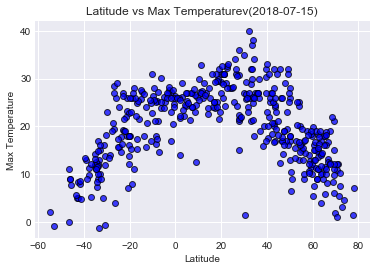

In [51]:
date = cities['Date'][0]

Latitude = pd.to_numeric(cities["Latitude"])
Temp = pd.to_numeric(cities["Max Temperature"])

convert_date = datetime.date(datetime.utcfromtimestamp(date))

plt.title(f"Latitude vs Max Temperaturev({convert_date})")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.scatter(x=Latitude, y=Temp, color="blue", alpha=0.75, edgecolor ="black")
plt.grid(b=True, which ='major', color ='w', linewidth=1.0)
plt.grid(b=True, which ='minor', color ='w', linewidth=0.5)
sns.set_style("dark")
plt.show()
plt.savefig("lat_temp.png")

# Latitude vs. Humidity

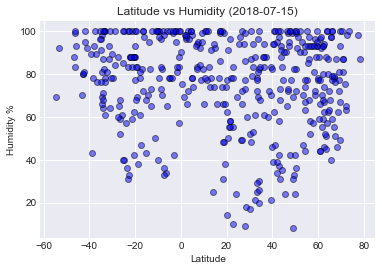

In [52]:
humidity = cities['Humidity']

plt.title(f"Latitude vs Humidity ({convert_date})")

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.scatter(x=Latitude, y=humidity, color="blue", alpha=0.50, edgecolor ="black")
plt.grid(b=True, which ='major', color ='w', linewidth=1.0)
plt.grid(b=True, which ='minor', color ='w', linewidth=0.5)
sns.set_style("dark")
plt.show()
plt.savefig("lat_humidity.png")

# Latitude vs. Cloudiness

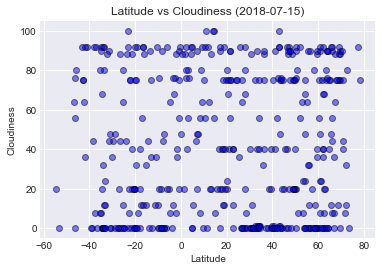

In [53]:
cloudiness = cities['Cloudiness']
plt.title(f"Latitude vs Cloudiness ({convert_date})")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x=Latitude, y=cloudiness, color="blue", alpha=0.50, edgecolor ="black")
plt.grid(b=True, which ='major', color ='w', linewidth=1.0)
plt.grid(b=True, which ='minor', color ='w', linewidth=0.5)
sns.set_style("dark")
plt.show()
plt.savefig("lat_cloudiness.png")

In [ ]:
Latitude vs. Wind Speed

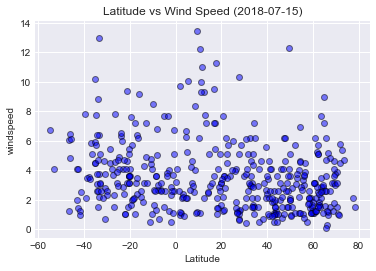

In [54]:
windspeed = cities['Wind Speed']
plt.title(f"Latitude vs Wind Speed ({convert_date})")

plt.xlabel("Latitude")
plt.ylabel("windspeed")
plt.scatter(x=Latitude, y=windspeed, color="blue", alpha=0.50, edgecolor ="black")
plt.grid(b=True, which ='major', color ='w', linewidth=1.0)
plt.grid(b=True, which ='minor', color ='w', linewidth=0.5)
sns.set_style("dark")
plt.show()
plt.savefig("lat_windspeed.png")